### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the quality of milk. You have been provided with a dataset named **`"milk_quality_data.csv"`**, which includes various parameters that affect milk quality. The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the grade of the milk based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

**Dataset credits:** shrijayan (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data)

**Import Necessary Libraries**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


### Task 1: Data Preparation and Exploration

1. Import the data from the `"milk_quality_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the target variable `grade` by mapping it to numbers `(low = 0, medium = 1, high = 2)`.
6. Visualize the distribution of key features `(ph, temperature)` using histograms.

In [2]:
df = pd.read_csv("milk_quality_data.csv")
print(df.shape)
df.head()

(1059, 8)


,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
print(df["grade"].unique())
df.isnull().sum()

['high' 'low' 'medium']


ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64

In [5]:
df["grade"]=df["grade"].map({
    'high':2,
    'medium':1,
    'low':0
})
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


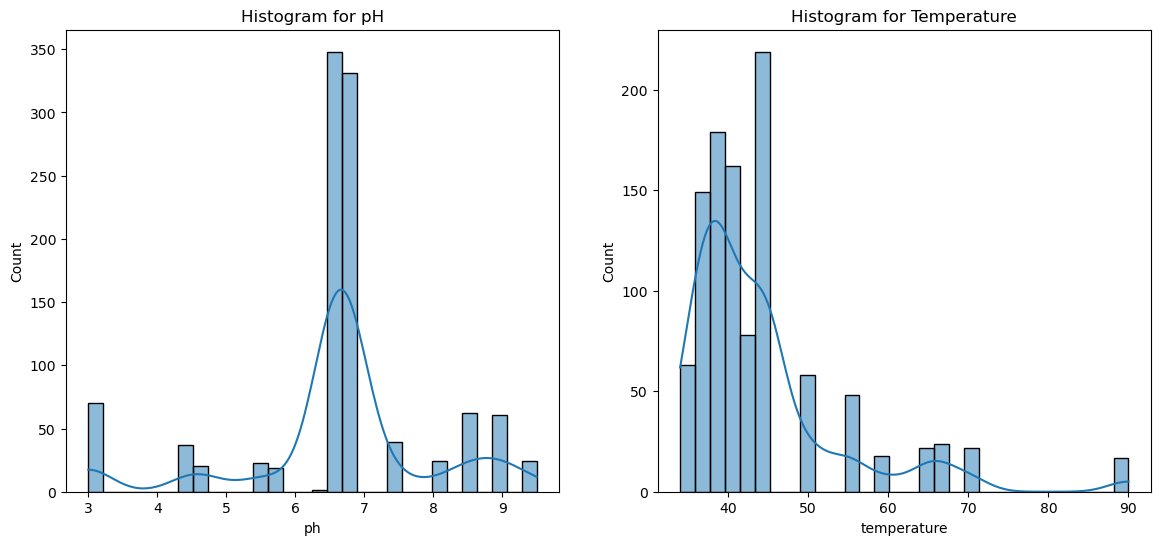

In [9]:
from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sb.histplot(df["ph"],bins=30,kde=True)
plt.title("Histogram for pH")

plt.subplot(1,2,2)
sb.histplot(df["temperature"],bins=30,kde=True)
plt.title("Histogram for Temperature")
plt.show()

### Task 2: Model Training Using Basic Models

1. Select the features `(ph, temperature, taste, odor, fat, turbidity, colour)` and the target variable `(grade)` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Logistic Regression model using the training data.
4. Print the model's accuracy score on test data.
5. Initialize and train a Decision Tree Classifier using the training data.
6. Print the model's accuracy score on test data.

In [10]:
X = df.drop("grade",axis=1)
y = df["grade"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


### Training LogisticRegression Model

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred_log = model.predict(X_test)
cr = classification_report(y_test,y_pred_log)
print(cr)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88       115
           1       0.95      0.83      0.89       127
           2       0.72      0.84      0.78        76

    accuracy                           0.86       318
   macro avg       0.85      0.85      0.85       318
weighted avg       0.87      0.86      0.86       318

Logistic Regression Accuracy: 0.8553459119496856


### Training Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred_dt = model.predict(X_test)
cr = classification_report(y_test,y_pred_dt)
print(cr)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       115
           1       1.00      1.00      1.00       127
           2       0.99      0.99      0.99        76

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

Decision Tree Classifier Accuracy: 0.9937106918238994


### Task 3: Model Training Using Advanced Models

1. Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data.
2. Print the model's accuracy score on test data.
3. Initialize and train an XGBoost Classifier with 50 estimators using the training data.
4. Print the model's accuracy score on test data.

### Training Gradient Boost Model

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=50)
model.fit(X_train,y_train)
y_pred_gb = model.predict(X_test)
cr = classification_report(y_test,y_pred_gb)
print(cr)
print("GradientBoosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       115
           1       0.98      1.00      0.99       127
           2       0.99      0.99      0.99        76

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

GradientBoosting Classifier Accuracy: 0.9905660377358491


### Training XGBoost Classifier

In [34]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=50)
model.fit(X_train,y_train)
y_pred_xgb = model.predict(X_test)
cr = classification_report(y_test,y_pred_xgb)
print(cr)
print("eXtreme GradientBoosting Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      0.99      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

eXtreme GradientBoosting Classifier Accuracy: 0.9968553459119497


### Task 4: Experiment with Hyperparameters in XGBoost

1. Train the XGBoost model with the following parameters
    - n_estimators=100
    - max_depth=5
    - learning_rate=0.1
    - colsample_bytree=0.5.

Learn about these parameters here: [XgboostClassifier Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Evaluate the model's performance using accuracy score and print it.
3. Print the classification report and confusion matrix for the model.

In [33]:
model_params = {
    'n_estimators':100,
    'max_depth':5,
    'learning_rate':0.1,
    'colsample_bytree':0.5
}
model = XGBClassifier(**model_params)
model.fit(X_train,y_train)
y_pred_xgb = model.predict(X_test)
cr = classification_report(y_test,y_pred_xgb)


In [35]:
print(cr)
print("eXtreme GradientBoosting Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      0.99      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

eXtreme GradientBoosting Classifier Accuracy: 0.9968553459119497


In [37]:
cm = confusion_matrix(y_test,y_pred_xgb)
cm

array([[115,   0,   0],
       [  0, 127,   0],
       [  0,   1,  75]], dtype=int64)

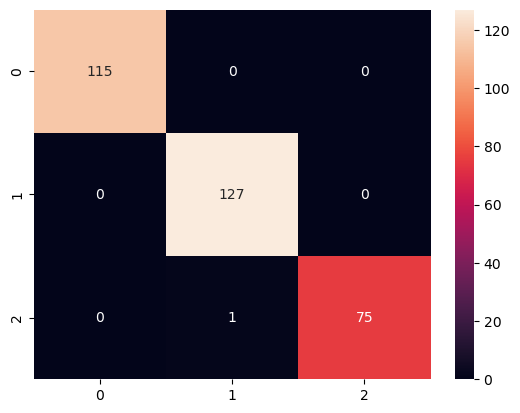

In [42]:
sb.heatmap(cm,annot=True,fmt="d")
plt.show()